In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [114]:
df = pd.read_csv("round_data.csv")

In [115]:
print(df.head())

            Date    Course  Hole  Shot Distance Club  Lie Distance Lie   Exp  \
0  July 10, 2021  Glendale     1     1      540    D    T         540T  4.65   
1  July 10, 2021  Glendale     1     2        P  NaN  NaN            P  4.42   
2  July 10, 2021  Glendale     1     3      200    7    R         200R  3.42   
3  July 10, 2021  Glendale     1     4       30   60    R          30R  2.78   
4  July 10, 2021  Glendale     1     5       15    P    G          15G  1.79   

   Strokes Distance Label Direction_Result Distance_Result  Penalty  Par  \
0    -0.77          250 +      pretty left            good        1    5   
1     0.00            NaN              NaN             NaN        0    5   
2    -0.36        176-200      pretty left   slightly long        0    5   
3    -0.01          26-50     slight right  slightly short        0    5   
4     0.79        G 10-15             good            good        0    5   

   Updated Distance Updated Distance Cat  Relative to Par  
0 

In [116]:
heatmap_df = dir_dist[(dir_dist['Lie'] == 'T') | (dir_dist['Lie'] == 'F') |(dir_dist['Lie'] == 'R') |
                      (dir_dist['Lie'] == 'G')]

In [117]:
# create a crosstab of the two columns
ct = pd.crosstab(heatmap_df['Distance_Result'], heatmap_df['Direction_Result'])

new_index = ['way long', 'pretty long', 'slightly long', 'good', 'slightly short', 'pretty short', 'way short']
new_columns = ['way left', 'pretty left', 'slight left', 'good', 'slight right', 'pretty right', 'way right']

ct = ct.reindex(index=new_index, columns=new_columns)

# Calculate the average values of strokes gained for each category combination
avg = heatmap_df.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()

In [118]:
avg_pivot = avg.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot = avg_pivot.reindex(index=new_index, columns=new_columns)

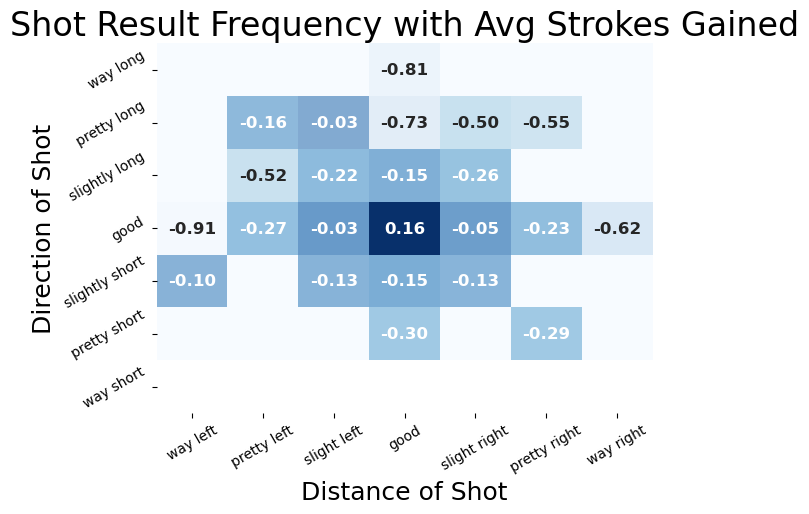

In [122]:
# create the heatmap
sns.heatmap(ct, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot, annot=True, cmap='Blues', cbar=False, alpha=0.5, fmt='.2f',
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# Set the axis labels and title
plt.xlabel('Distance of Shot', fontsize=18)
plt.ylabel('Direction of Shot', fontsize=18)
plt.title('Shot Result Frequency with Avg Strokes Gained', fontsize=24)

plt.xticks(rotation=30)
plt.yticks(rotation=30)

# Show the plot
plt.show()

In [14]:
_0_25 = heatmap_df[heatmap_df['Distance Label'] == '0-25']
_26_75 = heatmap_df[(heatmap_df['Distance Label'] == '26-50') | (heatmap_df['Distance Label'] == '51-75')]
_76_125 = heatmap_df[(heatmap_df['Distance Label'] == '76-100') | (heatmap_df['Distance Label'] == '101-125')]
_126_175 = heatmap_df[(heatmap_df['Distance Label'] == '126-150') | (heatmap_df['Distance Label'] == '151-175')]
_176_225 = heatmap_df[(heatmap_df['Distance Label'] == '176-200') | (heatmap_df['Distance Label'] == '201-225')]
Drives = heatmap_df[heatmap_df['Distance Label'] == '250 +']
G_4_9 = heatmap_df[(heatmap_df['Distance Label'] == 'G 4-6')  | (heatmap_df['Distance Label'] == 'G 7-9')]
G_10_plus = heatmap_df[(heatmap_df['Distance Label'] == 'G 10-15') | (heatmap_df['Distance Label'] == 'G 16-20') |
                       (heatmap_df['Distance Label'] == 'G 21-25') | (heatmap_df['Distance Label'] == 'G 26-35') | 
                        (heatmap_df['Distance Label'] == 'G 36-45')]

# create a crosstab of the two columns
ct_0_25 = pd.crosstab(_0_25['Distance_Result'], _0_25['Direction_Result'])
ct_26_75 = pd.crosstab(_26_75['Distance_Result'], _26_75['Direction_Result'])
ct_76_125 = pd.crosstab(_76_125['Distance_Result'], _76_125['Direction_Result'])
ct_126_175 = pd.crosstab(_126_175['Distance_Result'], _126_175['Direction_Result'])
ct_176_225 = pd.crosstab(_176_225['Distance_Result'], _176_225['Direction_Result'])
ct_Drives = pd.crosstab(Drives['Distance_Result'], Drives['Direction_Result'])
ct_G_4_9 = pd.crosstab(G_4_9['Distance_Result'], G_4_9['Direction_Result'])
ct_G_10_plus = pd.crosstab(G_10_plus['Distance_Result'], G_10_plus['Direction_Result'])

new_index = ['way long', 'pretty long', 'slightly long', 'good', 'slightly short', 'pretty short', 'way short']
new_columns = ['way left', 'pretty left', 'slight left', 'good', 'slight right', 'pretty right', 'way right']

ct_0_25 = ct_0_25.reindex(index=new_index, columns=new_columns)
ct_26_75 = ct_26_75.reindex(index=new_index, columns=new_columns)
ct_76_125 = ct_76_125.reindex(index=new_index, columns=new_columns)
ct_126_175 = ct_126_175.reindex(index=new_index, columns=new_columns)
ct_176_225 = ct_176_225.reindex(index=new_index, columns=new_columns)
ct_Drives = ct_Drives.reindex(index=new_index, columns=new_columns)
ct_G_4_9 = ct_G_4_9.reindex(index=new_index, columns=new_columns)
ct_G_10_plus = ct_G_10_plus.reindex(index=new_index, columns=new_columns)

# Calculate the average values of strokes gained for each category combination
avg_0_25 = _0_25.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()
avg_26_75 = _26_75.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()
avg_76_125 = _76_125.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()
avg_126_175 = _126_175.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()
avg_176_225 = _176_225.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()
avg_Drives = Drives.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()
avg_G_4_9 = G_4_9.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()
avg_G_10_plus = G_10_plus.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()

In [15]:
avg_pivot_0_25 = avg_0_25.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot_0_25 = avg_pivot_0_25.reindex(index=new_index, columns=new_columns)

avg_pivot_26_75 = avg_26_75.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot_26_75 = avg_pivot_26_75.reindex(index=new_index, columns=new_columns)

avg_pivot_76_125 = avg_76_125.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot_76_125 = avg_pivot_76_125.reindex(index=new_index, columns=new_columns)

avg_pivot_126_175 = avg_126_175.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot_126_175 = avg_pivot_126_175.reindex(index=new_index, columns=new_columns)

avg_pivot_176_225 = avg_176_225.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot_176_225 = avg_pivot_176_225.reindex(index=new_index, columns=new_columns)

avg_pivot_Drives = avg_Drives.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot_Drives = avg_pivot_Drives.reindex(index=new_index, columns=new_columns)

avg_pivot_G_4_9 = avg_G_4_9.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot_G_4_9 = avg_pivot_G_4_9.reindex(index=new_index, columns=new_columns)

avg_pivot_G_10_plus = avg_G_10_plus.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot_G_10_plus = avg_pivot_G_10_plus.reindex(index=new_index, columns=new_columns)

In [16]:
num_shots_0_25 = len(_0_25)
pct_25_0_25 = round(np.percentile(_0_25['Strokes'], 25), 2)
pct_50_0_25 = round(np.percentile(_0_25['Strokes'], 50), 2)
pct_75_0_25 = round(np.percentile(_0_25['Strokes'], 75), 2)

num_shots_26_75 = len(_26_75)
pct_25_26_75 = round(np.percentile(_26_75['Strokes'], 25), 2)
pct_50_26_75 = round(np.percentile(_26_75['Strokes'], 50), 2)
pct_75_26_75 = round(np.percentile(_26_75['Strokes'], 75), 2)

num_shots_76_125 = len(_76_125)
pct_25_76_125 = round(np.percentile(_76_125['Strokes'], 25), 2)
pct_50_76_125 = round(np.percentile(_76_125['Strokes'], 50), 2)
pct_75_76_125 = round(np.percentile(_76_125['Strokes'], 75), 2)

num_shots_126_175 = len(_126_175)
pct_25_126_175 = round(np.percentile(_126_175['Strokes'], 25), 2)
pct_50_126_175 = round(np.percentile(_126_175['Strokes'], 50), 2)
pct_75_126_175 = round(np.percentile(_126_175['Strokes'], 75), 2)

num_shots_176_225 = len(_176_225)
pct_25_176_225 = round(np.percentile(_176_225['Strokes'], 25), 2)
pct_50_176_225 = round(np.percentile(_176_225['Strokes'], 50), 2)
pct_75_176_225 = round(np.percentile(_176_225['Strokes'], 75), 2)

num_shots_Drives = len(Drives)
pct_25_Drives = round(np.percentile(Drives['Strokes'], 25), 2)
pct_50_Drives = round(np.percentile(Drives['Strokes'], 50), 2)
pct_75_Drives = round(np.percentile(Drives['Strokes'], 75), 2)

num_shots_G_4_9 = len(G_4_9)
pct_25_G_4_9 = round(np.percentile(G_4_9['Strokes'], 25), 2)
pct_50_G_4_9 = round(np.percentile(G_4_9['Strokes'], 50), 2)
pct_75_G_4_9 = round(np.percentile(G_4_9['Strokes'], 75), 2)

num_shots_G_10_plus = len(G_10_plus)
pct_25_G_10_plus = round(np.percentile(G_10_plus['Strokes'], 25), 2)
pct_50_G_10_plus = round(np.percentile(G_10_plus['Strokes'], 50), 2)
pct_75_G_10_plus = round(np.percentile(G_10_plus['Strokes'], 75), 2)

In [123]:
# create the heatmap
sns.heatmap(ct_0_25, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot_0_25, 
            annot=True, fmt='.2f', cmap='Blues', cbar=False, alpha=0.5,
            annot_kws={'fontsize':12, 'fontweight':'bold'})


# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title(f"# Shots: {num_shots_0_25} ; 25th%: {pct_25_0_25} ; 50th%: {pct_50_0_25} ; 75th%: {pct_75_0_25}", fontsize=14)
plt.xticks(rotation=335)
plt.yticks(rotation=55)

# Save the plot
plt.savefig('_0_25.png')
plt.clf()

# create the heatmap
sns.heatmap(ct_26_75, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot_26_75, 
            annot=True, fmt='.2f', cmap='Blues', cbar=False, alpha=0.5,
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title(f"# Shots: {num_shots_26_75} ; 25th%: {pct_25_26_75} ; 50th%: {pct_50_26_75} ; 75th%: {pct_75_26_75}"
          , fontsize=14)
plt.xticks(rotation=335)
plt.yticks(rotation=55)

# Save the plot
plt.savefig('_26_75.png')
plt.clf()

# create the heatmap
sns.heatmap(ct_76_125, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot_76_125, 
            annot=True, fmt='.2f', cmap='Blues', cbar=False, alpha=0.5,
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title(f"# Shots: {num_shots_76_125} ; 25th%: {pct_25_76_125} ; 50th%: {pct_50_76_125} ; 75th%: {pct_75_76_125}",
          fontsize=14)
plt.xticks(rotation=335)
plt.yticks(rotation=55)

# Save the plot
plt.savefig('_76_125.png')
plt.clf()

# create the heatmap
sns.heatmap(ct_126_175, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot_126_175, 
            annot=True, fmt='.2f', cmap='Blues', cbar=False, alpha=0.5,
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title(f"# Shots: {num_shots_126_175} ; 25th%: {pct_25_126_175} ; 50th%: {pct_50_126_175} ; 75th%: {pct_75_126_175}",
          fontsize=14)
plt.xticks(rotation=335)
plt.yticks(rotation=55)

# Save the plot
plt.savefig('_126_175.png')
plt.clf()

# create the heatmap
sns.heatmap(ct_176_225, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot_176_225, 
            annot=True, fmt='.2f', cmap='Blues', cbar=False, alpha=0.5,
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title(f"# Shots: {num_shots_176_225} ; 25th%: {pct_25_176_225} ; 50th%: {pct_50_176_225} ; 75th%: {pct_75_176_225}",
          fontsize=14)
plt.xticks(rotation=335)
plt.yticks(rotation=55)

# Save the plot
plt.savefig('_176_225.png')
plt.clf()

# create the heatmap
sns.heatmap(ct_Drives, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot_Drives, 
            annot=True, fmt='.2f', cmap='Blues', cbar=False, alpha=0.5,
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title(f"# Shots: {num_shots_Drives} ; 25th%: {pct_25_Drives} ; 50th%: {pct_50_Drives} ; 75th%: {pct_75_Drives}",
          fontsize=14)
plt.xticks(rotation=335)
plt.yticks(rotation=55)

# Save the plot
plt.savefig('_Drives.png')
plt.clf()

# create the heatmap
sns.heatmap(ct_G_4_9, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot_G_4_9, 
            annot=True, fmt='.2f', cmap='Blues', cbar=False, alpha=0.5,
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title(f"# Shots: {num_shots_G_4_9} ; 25th%: {pct_25_G_4_9} ; 50th%: {pct_50_G_4_9} ; 75th%: {pct_75_G_4_9}",
          fontsize=14)
plt.xticks(rotation=335)
plt.yticks(rotation=55)

# Save the plot
plt.savefig('G_4_9.png')
plt.clf()


# create the heatmap
sns.heatmap(ct_G_10_plus, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot_G_10_plus, 
            annot=True, fmt='.2f', cmap='Blues', cbar=False, alpha=0.5,
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title(f"# Shots: {num_shots_G_10_plus} ; 25th%: {pct_25_G_10_plus} ; 50th%: {pct_50_G_10_plus} ; 75th%: {pct_75_G_10_plus}",
          fontsize=14)
plt.xticks(rotation=335)
plt.yticks(rotation=55)

# Save the plot
plt.savefig('G_10_plus.png')
plt.clf()

<Figure size 640x480 with 0 Axes>

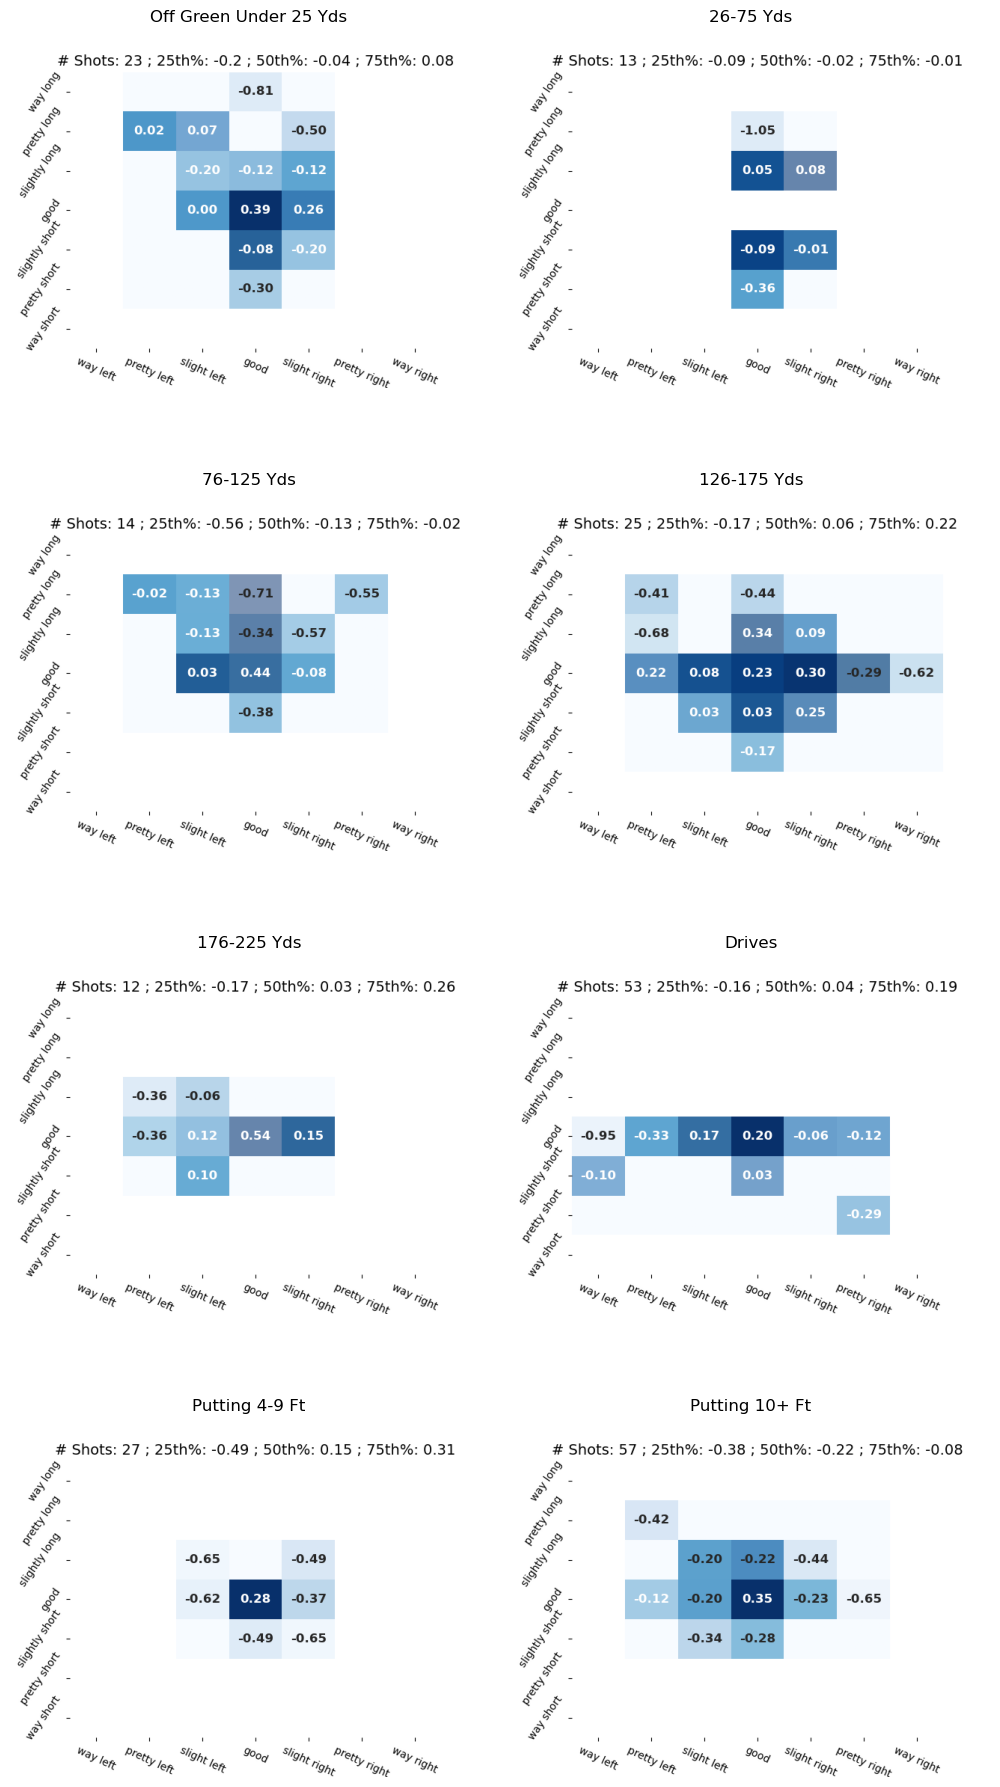

In [18]:
# Create a 1x3 subplot
fig, axs = plt.subplots(4, 2, figsize=(10, 24), sharey=True)

# Load the saved plots and display in the subplots
img1 = mpimg.imread('_0_25.png')
axs[0,0].imshow(img1)
axs[0,0].axis('off')
axs[0,0].set_title('Off Green Under 25 Yds')

img2 = mpimg.imread('_26_75.png')
axs[0,1].imshow(img2)
axs[0,1].axis('off')
axs[0,1].set_title('26-75 Yds')

img3 = mpimg.imread('_76_125.png')
axs[1,0].imshow(img3)
axs[1,0].axis('off')
axs[1,0].set_title('76-125 Yds')

img4 = mpimg.imread('_126_175.png')
axs[1,1].imshow(img4)
axs[1,1].axis('off')
axs[1,1].set_title('126-175 Yds')

img5 = mpimg.imread('_176_225.png')
axs[2,0].imshow(img5)
axs[2,0].axis('off')
axs[2,0].set_title('176-225 Yds')

img6 = mpimg.imread('_Drives.png')
axs[2,1].imshow(img6)
axs[2,1].axis('off')
axs[2,1].set_title('Drives')

img7 = mpimg.imread('G_4_9.png')
axs[3,0].imshow(img7)
axs[3,0].axis('off')
axs[3,0].set_title('Putting 4-9 Ft')

img8 = mpimg.imread('G_10_plus.png')
axs[3,1].imshow(img8)
axs[3,1].axis('off')
axs[3,1].set_title('Putting 10+ Ft', fontsize=12)

# Set labels for axes
# fig.text(0.5, -0.04, 'X axis', ha='center')
# fig.text(-0.04, 0.5, 'Y axis', va='center', rotation='vertical')

fig.tight_layout()
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.05, top=0.95, wspace=0.05, hspace=-0.4)

plt.show()

In [19]:
dist_sg_lie = df[['Lie', 'Strokes', 'Updated Distance']]
dist_sg_lie = dist_sg_lie[(dist_sg_lie['Lie'] != 'G') & (dist_sg_lie['Lie'] != 'WF')]
dist_sg_lie = dist_sg_lie.dropna(subset=['Lie'])
dist_sg_lie['Updated Distance'] = dist_sg_lie['Updated Distance'].astype(float)
print(dist_sg_lie)

    Lie  Strokes  Updated Distance
0     T   -0.770             540.0
2     R   -0.360             202.0
3     R   -0.010              38.0
5     T    0.290             407.0
6     F   -0.230              56.0
..   ..      ...               ...
694   X   -0.400              52.0
695   X   -0.600              12.0
696   F   -0.043              10.0
698   T    0.100             442.0
699   F    0.102             161.0

[395 rows x 3 columns]


In [20]:
dist_sg_lie.dtypes

Lie                  object
Strokes             float64
Updated Distance    float64
dtype: object

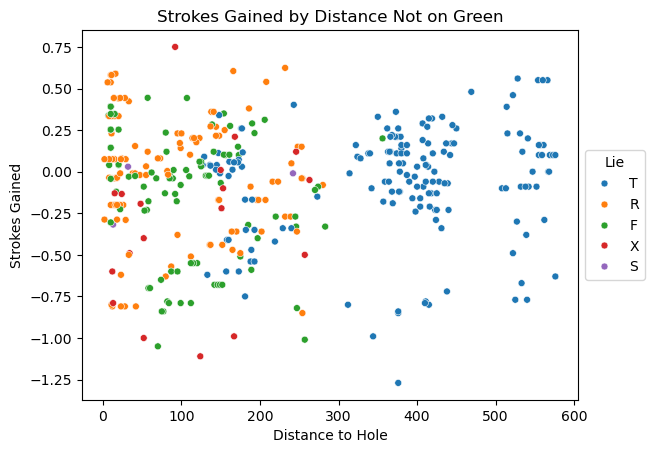

In [21]:
sns.scatterplot(x='Updated Distance', y='Strokes', data=dist_sg_lie, hue='Lie', legend=True, s=25)
plt.legend(title='Lie',loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Distance to Hole')
plt.ylabel('Strokes Gained')
plt.title('Strokes Gained by Distance Not on Green')

plt.show()

In [22]:
putting_sg = df[['Lie', 'Strokes', 'Distance', 'Relative to Par']]
putting_sg = putting_sg[putting_sg['Lie'] == 'G']
putting_sg['Relative to Par'] = putting_sg['Relative to Par'].astype(int)
putting_sg['Distance'] = putting_sg['Distance'].astype(float)

In [23]:
putting_sg.dtypes

Lie                 object
Strokes            float64
Distance           float64
Relative to Par      int32
dtype: object

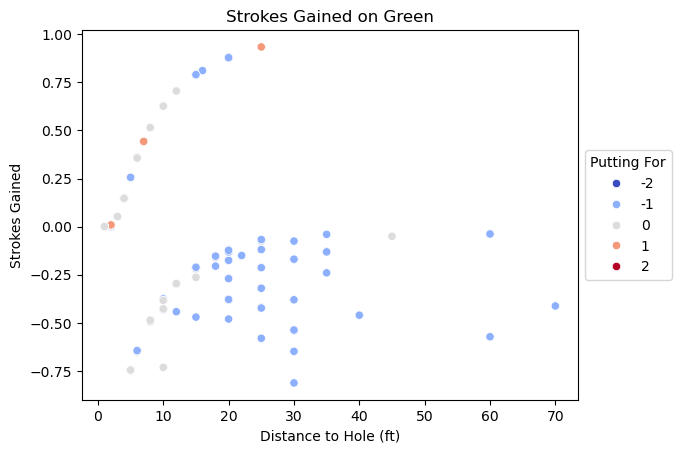

In [24]:
sns.scatterplot(x='Distance', y='Strokes', data=putting_sg, hue='Relative to Par', legend=True, palette="coolwarm")
plt.legend(title='Putting For',loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Distance to Hole (ft)')
plt.ylabel('Strokes Gained')
plt.title('Strokes Gained on Green')

plt.show()

In [25]:
hole_sg = df[['Lie', 'Distance', 'Hole', 'Strokes']]
hole_sg = hole_sg[hole_sg['Lie'] != 'WF']
hole_sg = hole_sg.dropna(subset=['Lie'])
hole_sg['Distance'] = hole_sg['Distance'].astype(float)

In [26]:
hole_sg.dtypes

Lie          object
Distance    float64
Hole          int64
Strokes     float64
dtype: object

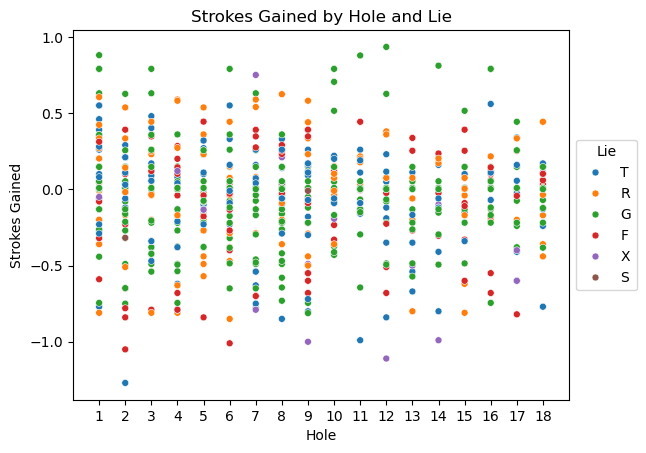

In [27]:
sns.scatterplot(x='Hole', y='Strokes', data=hole_sg, hue='Lie', legend=True, s=25)
plt.legend(title='Lie',loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Hole')
plt.ylabel('Strokes Gained')
plt.xlim(0,19)
plt.xticks(range(1,19))
plt.title('Strokes Gained by Hole and Lie')

plt.show()

In [112]:
putting_df = df[df['Lie'] == 'G']
putting_df.head()

putting_df = putting_df[['Distance', 'Strokes']]
putting_df['Distance'] = putting_df['Distance'].astype(int)
putting_df['Buckets'] = pd.cut(putting_df['Distance'], bins=[4, 7, 13, 21, 40, 200], labels=["4-6", "7-12", "13-20", "21-40", 
                                                                                       "40+"])
putting_df = putting_df.dropna(subset='Buckets')

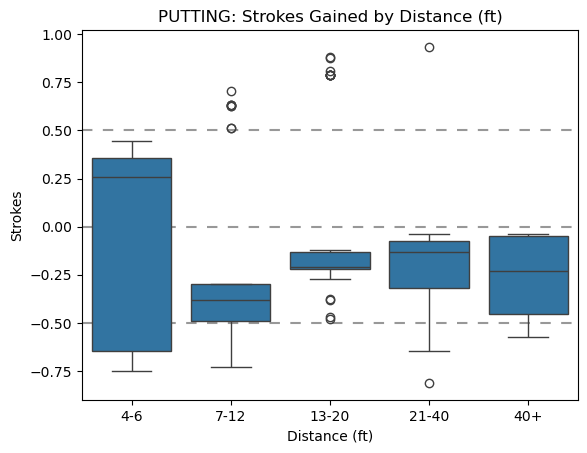

In [31]:
# boxplot
ax = sns.boxplot(x='Buckets', y='Strokes', data=putting_df)
# add stripplot
#ax = sns.stripplot(x='Buckets', y='Strokes', data=putting_df, color="orange", jitter=0.2, size=2.5)

# add title
plt.xlabel('Distance (ft)')
plt.title("PUTTING: Strokes Gained by Distance (ft)")

# Horizontal lines
HLINES = [-.5, 0, .5]

GREY50 = "#7f7f7f"

for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)


# show the graph
plt.show()

In [32]:
gs_rough = df[(df['Lie'] == 'R') ]     # & (df['Distance'] < 21)

gs_rough = gs_rough[['Distance', 'Strokes', 'Club']]
gs_rough['Distance'] = gs_rough['Distance'].astype(int)
gs_rough = gs_rough[gs_rough['Distance'] < 21]

#print(gs_rough.head(10))

C:\Users\richd\AppData\Local\Temp\ipykernel_304724\3287167487.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(label_order)


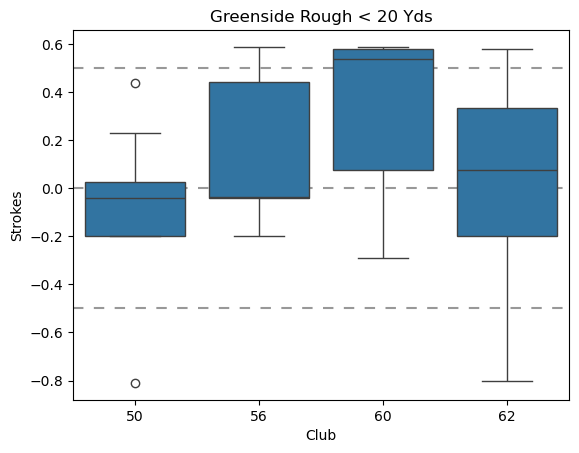

In [33]:
# boxplot
ax = sns.boxplot(x='Club', y='Strokes', data=gs_rough)

label_order = ['50', '56', '60', '62']
plt.gca().set_xticklabels(label_order)

# add title
plt.title("Greenside Rough < 20 Yds")

# Horizontal lines
HLINES = [-.5, 0, .5]

for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)


# show the graph
plt.show()

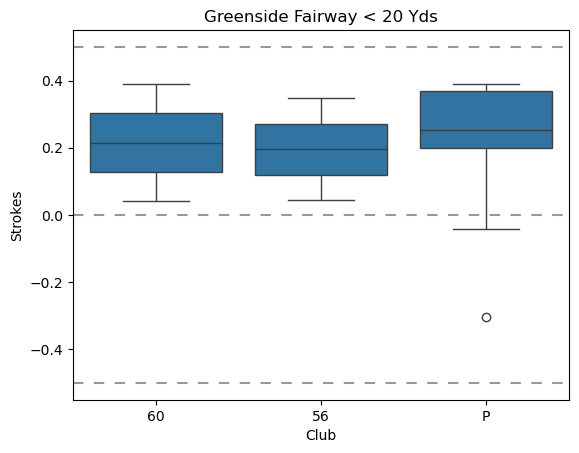

In [34]:
gs_fw = df[(df['Lie'] == 'F') ]     # & (df['Distance'] < 21)

gs_fw = gs_fw[['Distance', 'Strokes', 'Club']]
gs_fw['Distance'] = gs_fw['Distance'].astype(int)
gs_fw = gs_fw[gs_fw['Distance'] < 21]


threshold = 2

filtered_gs_fw = gs_fw.groupby('Club').filter(lambda x: len(x) >= threshold)

# boxplot
ax = sns.boxplot(x='Club', y='Strokes', data=filtered_gs_fw)

#label_order = ['50', '56', '60', '62']
#plt.gca().set_xticklabels(label_order)

# add title
plt.title("Greenside Fairway < 20 Yds")

# Horizontal lines
HLINES = [-.5, 0, .5]

for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)


# show the graph
plt.show()

C:\Users\richd\AppData\Local\Temp\ipykernel_304724\2660941805.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(label_order)


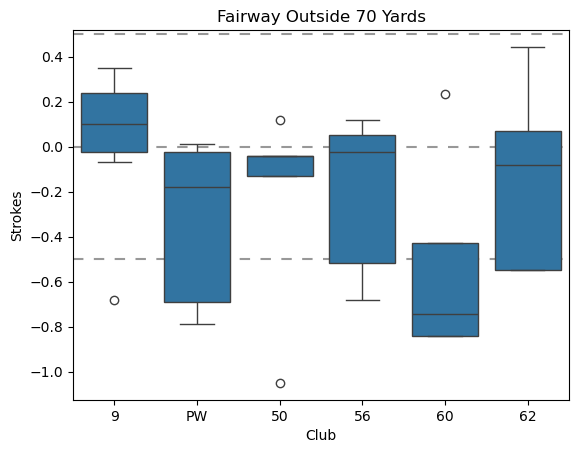

In [35]:
fw_shots = df[(df['Lie'] == 'F') ]     # & (df['Distance'] < 21)

fw_shots = fw_shots[['Distance', 'Strokes', 'Club']]
fw_shots['Distance'] = fw_shots['Distance'].astype(int)
fw_shots = fw_shots[(fw_shots['Distance'] > 68)]
short_irons = ['62', '60', '56', '50', 'PW', '9']
other_irons = ['8', '7', '6', '5', '4', '2']

fw_shots_short = fw_shots[fw_shots['Club'].isin(short_irons)]
fw_shots_other = fw_shots[fw_shots['Club'].isin(other_irons)]

threshold = 2

filtered_fw_shots_short = fw_shots_short.groupby('Club').filter(lambda x: len(x) >= threshold)
filtered_fw_shots_other = fw_shots_other.groupby('Club').filter(lambda x: len(x) >= threshold)

# boxplot
ax = sns.boxplot(x='Club', y='Strokes', data=filtered_fw_shots_short)

label_order = ['9', 'PW','50', '56', '60', '62']
plt.gca().set_xticklabels(label_order)

# add title
plt.title("Fairway Outside 70 Yards")

# Horizontal lines
HLINES = [-.5, 0, .5]

for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)


# show the graph
plt.show()

C:\Users\richd\AppData\Local\Temp\ipykernel_304724\4238169496.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(label_order)


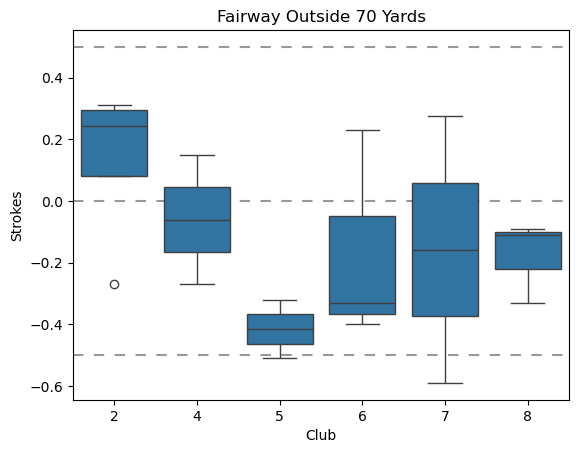

In [36]:
# boxplot
ax = sns.boxplot(x='Club', y='Strokes', data=filtered_fw_shots_other)

label_order = ['2', '4','5', '6', '7', '8']
plt.gca().set_xticklabels(label_order)

# add title
plt.title("Fairway Outside 70 Yards")

# Horizontal lines
HLINES = [-.5, 0, .5]

for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)


# show the graph
plt.show()

In [37]:
off_green = df[(df['Lie'] == 'X') | (df['Lie'] == 'S') | (df['Lie'] == 'R') | (df['Lie'] == 'F') |
              (df['Lie'] == 'T')]
off_green = off_green[['Lie', 'Distance', 'Strokes']]
off_green['Distance'] = off_green['Distance'].astype(int)

In [38]:
off_green['Dist'] = pd.cut(off_green['Distance'], bins=[0,31, 61, 91, 121, 151, 181,211, 241, 271, 900], 
                           labels=["0-30", "31-60", "61-90", "91-120", "121-150", "151-180", "181-210", "211-240",
                                  "241-270", "270+"])
off_green.loc[off_green['Lie'] == 'T', 'Lie'] = 'T/F'
off_green.loc[off_green['Lie'] == 'F', 'Lie'] = 'T/F'
off_green.head()

,Lie,Distance,Strokes,Dist
0,T/F,540,-0.77,270+
2,R,200,-0.36,181-210
3,R,30,-0.01,0-30
5,T/F,400,0.29,270+
6,T/F,55,-0.23,31-60


In [100]:
shots_count = round(off_green.groupby(['Dist', 'Lie'])['Strokes'].size().reset_index(),2)

## Calculate the average values of strokes gained for each category combination
shots_min = round(off_green.groupby(['Dist', 'Lie'])['Strokes'].min().reset_index(),2)
shots_25 = round(off_green.groupby(['Dist', 'Lie'])['Strokes'].quantile(.25).reset_index(),2)
shots_avg = round(off_green.groupby(['Dist', 'Lie'])['Strokes'].mean().reset_index(),2)
shots_med = round(off_green.groupby(['Dist', 'Lie'])['Strokes'].quantile(.50).reset_index(),2)
shots_75 = round(off_green.groupby(['Dist', 'Lie'])['Strokes'].quantile(.75).reset_index(),2)
shots_max = round(off_green.groupby(['Dist', 'Lie'])['Strokes'].max().reset_index(),2)

In [101]:
shots_count = shots_count.rename(columns={'Strokes': '# Shots'})

shots_min = shots_min.rename(columns={'Strokes': 'Min'})
shots_25 = shots_25.rename(columns={'Strokes': '25th'})
shots_avg = shots_avg.rename(columns={'Strokes': 'Avg'})
shots_med = shots_med.rename(columns={'Strokes': '50th'})
shots_75 = shots_75.rename(columns={'Strokes': '75th'})
shots_max = shots_max.rename(columns={'Strokes': 'Max'})

In [124]:
shots_sg_table = shots_count.merge(shots_min).merge(shots_25).merge(shots_avg).merge(shots_med).merge(shots_75).merge(shots_max)

In [125]:
custom_sort = {'T/F': 0, 'R': 1, 'X': 2, 'S': 3}

shots_sg_table = shots_sg_table.sort_values(by=['Lie', 'Dist'], ascending=[True, True], 
                                            key=lambda x: x.map(custom_sort)).reset_index(drop=True)
shots_sg_table

,Dist,Lie,# Shots,Min,25th,Avg,50th,75th,Max
0,0-30,T/F,22,-0.30,0.04,0.18,0.25,0.35,0.39
1,31-60,T/F,8,-0.70,-0.23,-0.11,-0.06,-0.02,0.44
2,61-90,T/F,16,-1.05,-0.78,-0.43,-0.60,-0.04,0.24
3,91-120,T/F,13,-0.79,-0.55,-0.20,-0.08,0.01,0.44
4,121-150,T/F,23,-0.68,-0.31,-0.12,0.01,0.05,0.34
5,151-180,T/F,26,-0.75,-0.39,-0.11,0.04,0.10,0.35
6,181-210,T/F,11,-0.59,-0.50,-0.18,-0.35,0.25,0.31
7,211-240,T/F,5,-0.42,-0.34,-0.19,-0.34,-0.27,0.40
8,241-270,T/F,5,-1.01,-0.82,-0.50,-0.33,-0.27,-0.09
9,270+,T/F,132,-1.27,-0.13,-0.03,0.04,0.16,0.56


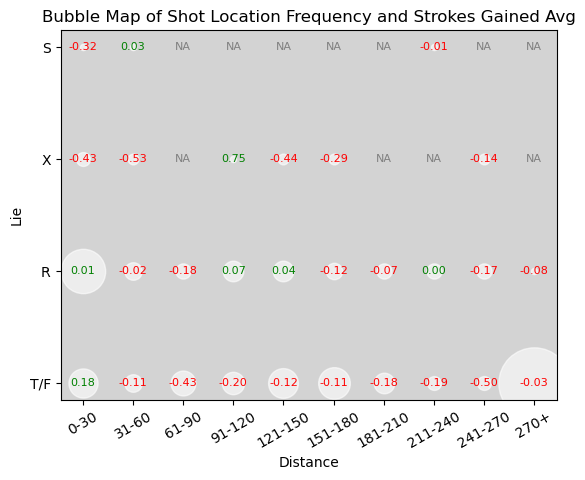

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Calculate frequencies and means
frequencies = off_green.groupby(['Dist', 'Lie'])['Strokes'].count()
means = off_green.groupby(['Dist', 'Lie'])['Strokes'].mean()

# Create a scatter plot
fig, ax = plt.subplots()

# Set background colors
#fig.set_facecolor('lightblue')  
ax.set_facecolor('lightgrey')   

# Map 'Lie' categories to numbers for plotting on the y-axis
lie_categories = off_green['Lie'].unique()
lie_mapping = {category: i for i, category in enumerate(lie_categories)}

# Plot each bubble with 'Dist' on x-axis and 'Lie' on y-axis
for (dist, lie), freq in frequencies.items():
    mean_value = means[(dist, lie)]
    color = 'white' if mean_value < threshold else 'red'  # Choose a threshold based on your data
    size = freq * 20  # Choose an appropriate scaling factor

    ax.scatter(dist, lie_mapping[lie], s=size, c=color, alpha=0.6, edgecolors='w')
    
    # Determine annotation color based on mean value
    if pd.isna(mean_value):
        annotation_color = 'grey'  # Color for NA values
    elif mean_value > 0:
        annotation_color = 'green'  # Color for positive values
    else:
        annotation_color = 'red'  # Color for negative values

    # Annotate the mean value on each bubble
    ax.text(dist, lie_mapping[lie], f'{mean_value:.2f}' if pd.notna(mean_value) else 'NA', 
            color=annotation_color, ha='center', va='center', fontsize=8)

# Add labels and title
ax.set_xlabel('Distance')
ax.set_ylabel('Lie')
plt.yticks(range(len(lie_categories)), lie_categories)
plt.xticks(rotation=30)
plt.title('Bubble Map of Shot Location Frequency and Strokes Gained Avg')

plt.show()
